## Setup

In [1]:
source("/research/lab_reiberger/2022_PSVD_metabolomics/2022_PSVD_metabolomics/R/00_setup.R")

In [2]:
p_load("dplyr", "ggplot2", "mice", "janitor", "POMA", "SummarizedExperiment", "EnhancedVolcano", install = FALSE)

In [3]:
metabol <- read.csv("outputs/01_metabolomics_merged.csv")
metabol <- metabol[2:ncol(metabol)]
metadata <- read.csv("outputs/01_metadata.csv")
metadata <- metadata[2:ncol(metadata)]

In [19]:
metabol

sample_id,ce_18_1,ce_18_2,ce_20_3,ce_20_4,cer_d34_1,cer_d40_1,cer_d41_1,cer_d42_0,cer_d42_1,⋯,tryptophan,tyrosine,uracil,uric_acid,uridine,uridine_monophosphate,valine,xanthine,xanthosine,xylitol
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2341,0.87377324,-1.653401295,-2.54570110,-0.5145847618,0.20984169,0.39586352,-0.14102874,0.95544136,0.01928275,⋯,0.24309086,0.25319019,1.3479574950,0.750077195,2.05693042,1.541864619,-0.98094786,0.21481274,-0.14472339,-0.20531937
2344,0.77105059,-1.408590877,-1.91379118,-2.8249166084,1.31596096,0.62103478,0.24820137,0.89018079,0.41807222,⋯,-0.47108517,1.44035624,0.3851062776,-0.013010752,0.61534263,0.178852877,-0.50705960,0.02296368,-0.26243347,-0.13532382
2358,0.47944790,-0.125778976,-0.76436481,-2.9303145202,1.20143113,0.72964011,0.35077762,0.79159246,0.64385992,⋯,-0.34795923,-1.07315151,0.0734063131,-0.700575659,1.06028877,0.292959938,-0.36126551,2.94534515,0.29074222,-0.50319917
2360,-0.32595624,-1.220013073,-1.38068415,-2.5027902619,1.11749203,-0.37260269,-1.01787849,-0.51513349,-1.30553155,⋯,0.29465975,1.15383992,-0.3083285214,0.675823314,-1.60178522,0.453998614,-0.35831719,-1.02691558,0.06971075,0.12907229
2390,1.10654421,-0.399392682,-0.57669375,-1.4721763417,0.77214094,0.78336252,0.52077740,0.43324903,0.46018084,⋯,-1.31307928,-1.32305292,0.6457431787,-1.344994924,-0.04443256,0.727527009,0.03934600,0.67366936,0.01939873,-0.37356260
2427,-0.49157270,-0.815725931,-1.89961331,-0.3244311854,0.82276737,0.95192217,0.30361571,0.35932954,0.69361256,⋯,-1.26684858,-0.88188167,0.3665874160,0.526990296,0.41470828,0.698086702,-0.67335792,0.73818742,0.08855576,-0.72682555
2432,-0.64729328,-1.551807333,-1.34286988,-1.8374433517,0.96866605,0.17787744,-0.93028452,0.20961478,0.07208633,⋯,-1.74694293,-1.41717608,-0.1278940613,0.999695820,-0.40660024,-0.087471028,-1.31930978,0.12315425,-0.04704799,1.32308009
2486,-1.44838200,0.084035609,0.15842481,-0.0002721556,0.05923921,-0.52595587,-0.25815473,0.44110379,-1.23513295,⋯,0.12174077,0.70712573,-0.1773845085,0.436948060,-0.98148473,0.243964007,0.74572254,0.78110295,-0.20954852,-0.28030934
2536,-1.18032106,-1.256661597,-0.52918120,-0.2058565801,0.68328613,-1.80002658,-1.43628639,-0.29117836,-2.01557633,⋯,-1.50888311,0.51135326,-0.2546276013,0.996576192,-0.16002439,0.459474076,-1.97579575,0.79211118,0.42895691,0.37097430


In [4]:
metadata <- metadata %>% filter(sample_id %in% metabol$sample_id)

In [5]:
metabolomics_obj <- PomaSummarizedExperiment(target = metadata, features = metabol[2:ncol(metabol)])

## Dimensionality reduction

In [6]:
p_plsda <- PomaMultivariate(metabolomics_obj, method = "plsda")

p_plsda <- p_plsda$scoresplot +
  ggplot2::ggtitle("PLS-DA")

validation argument is empty! Mfold will be used




comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%
comp 3 
  |======================================================================| 100%
comp 4 
  |======================================================================| 100%
comp 5 
  |======================================================================| 100%


Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


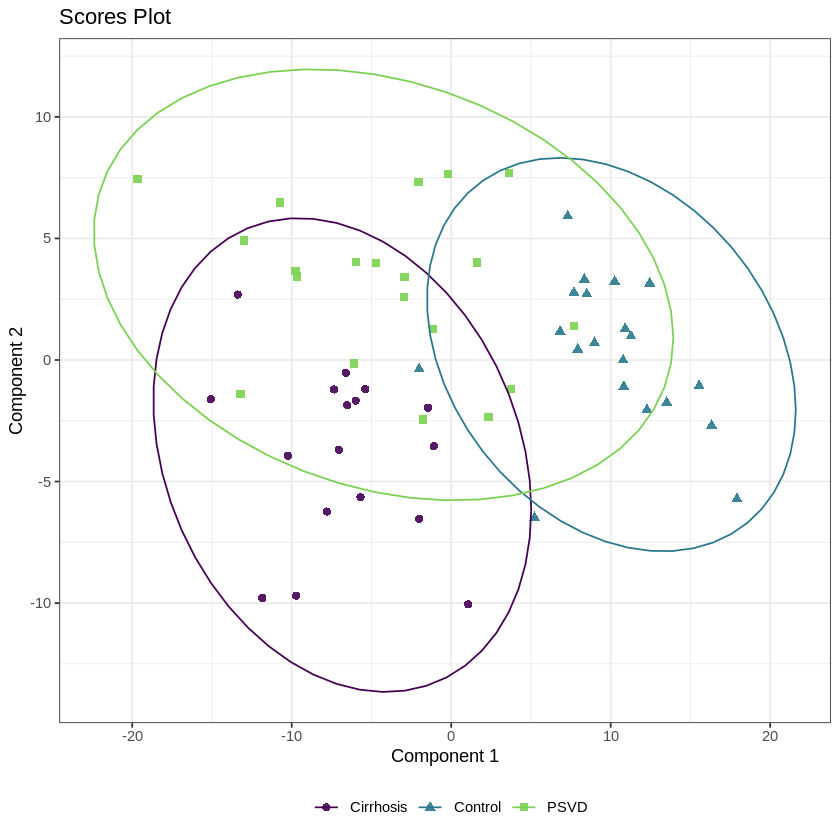

In [31]:
plsda

In [7]:
p_heatmap <- PomaCorr(metabolomics_obj, label_size = 8, coeff = 0.6)
p_heatmap$correlations

Loading required namespace: ggraph



feature1,feature2,corr,pvalue,FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>
pc_33_2,pe_36_2,0.9858837,3.687595e-45,1.260825e-40
lpc_o_16_0,lpc_o_18_1,0.9849575,2.159205e-44,3.691269e-40
pc_35_2,pe_38_2,0.9726015,3.589339e-37,4.090770e-33
tag_52_1,tag_52_2,0.9678619,2.937568e-35,2.510960e-31
tag_46_1,tag_46_2,0.9642248,5.634062e-34,3.852684e-30
tag_54_1,tag_56_1,0.9589458,2.477932e-32,1.412050e-28
lpe_18_0,lpe_20_3,0.9545544,4.022400e-31,1.964712e-27
tag_54_4,tag_56_4,0.9529616,1.033196e-30,4.415750e-27
tag_50_0,tag_50_1,0.9511817,2.854326e-30,1.084358e-26


## Differential metabolites

In [8]:
cir_cneg <- PomaLimma(metabolomics_obj, contrast  = "Cirrhosis-Control", adjust = "fdr")
psvd_cir <- PomaLimma(metabolomics_obj, contrast  = "PSVD-Cirrhosis", adjust = "fdr")
psvd_cneg <- PomaLimma(metabolomics_obj, contrast  = "PSVD-Control", adjust = "fdr")

Warning message:
“ggrepel: 113 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


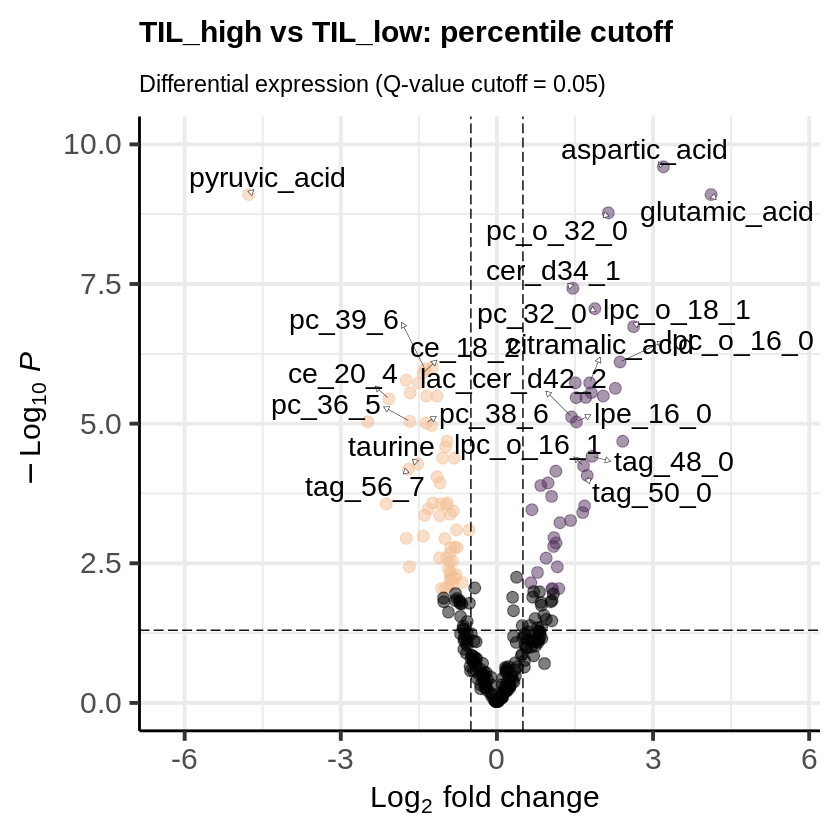

In [45]:
keyvals <- rep("#000000", nrow(cir_cneg))
names(keyvals) <- rep("NS", nrow(cir_cneg))

keyvals[which(cir_cneg$logFC >= 0.5 &
                cir_cneg$`adj.P.Val` < 0.01)] <- "#522f5c"
names(keyvals)[which(cir_cneg$logFC >= 0.5 &
                       cir_cneg$`adj.P.Val` < 0.01)] <- "Cirrhosis"
keyvals[which(cir_cneg$logFC <= -0.5 &
                cir_cneg$`adj.P.Val` <= 0.01)] <- "#F4C095"
names(keyvals)[which(cir_cneg$logFC <= -0.5 &
                       cir_cneg$`adj.P.Val` <= 0.01)] <- "Non-diseased"
     


EnhancedVolcano(cir_cneg,
                lab = cir_cneg$feature,
#                selectLab = rownames(ccl4_cpos_cneg)[which(names(keyvals_ccl4) %in% c('high', 'low'))],
                colCustom = keyvals,
                x = "logFC",
#                xlim = c(-10, 10),
                y = "adj.P.Val",
                ylim = c(0, 10),
                title = expression(bold("TIL_high vs TIL_low: percentile cutoff")),
                subtitle = "Differential expression (Q-value cutoff = 0.05)",
                caption = NULL,
                pCutoff = 0.05,
                FCcutoff = 0.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.15,
                max.overlaps = 16
               ) + theme(legend.position = "none")

Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


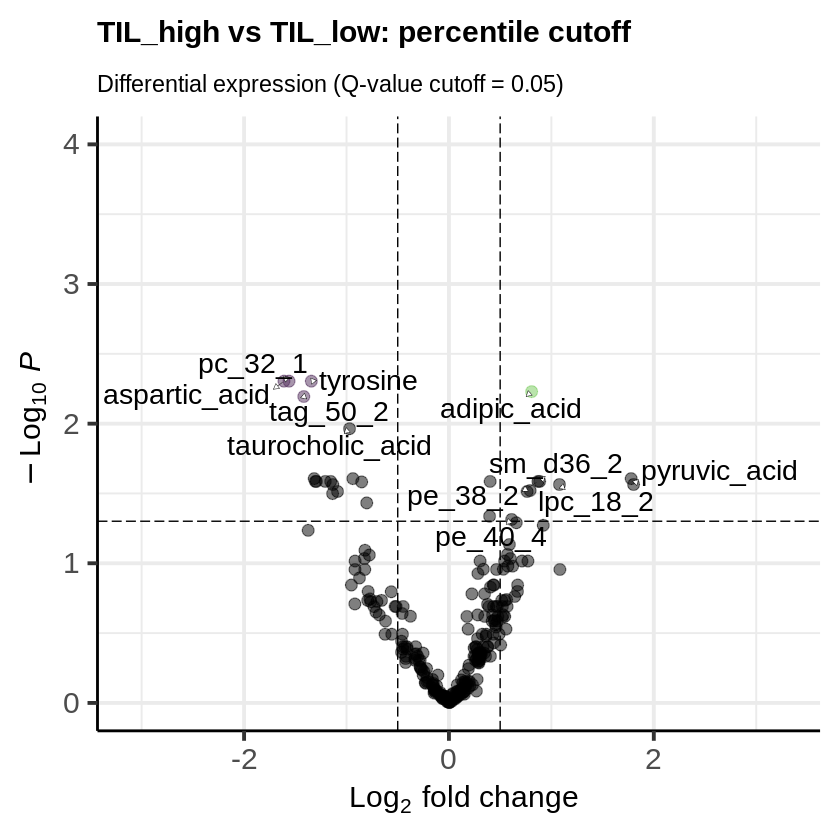

In [51]:
keyvals <- rep("#000000", nrow(psvd_cir))
names(keyvals) <- rep("NS", nrow(psvd_cir))

keyvals[which(psvd_cir$logFC >= 0.5 &
                psvd_cir$`adj.P.Val` < 0.01)] <- "#77c95a"
names(keyvals)[which(psvd_cir$logFC >= 0.5 &
                       psvd_cir$`adj.P.Val` < 0.01)] <- "PSVD"
keyvals[which(psvd_cir$logFC <= -0.5 &
                psvd_cir$`adj.P.Val` <= 0.01)] <- "#522f5c"
names(keyvals)[which(psvd_cir$logFC <= -0.5 &
                       psvd_cir$`adj.P.Val` <= 0.01)] <- "Cirrhosis"
     


EnhancedVolcano(psvd_cir,
                lab = psvd_cir$feature,
#                selectLab = rownames(ccl4_cpos_cneg)[which(names(keyvals_ccl4) %in% c('high', 'low'))],
                colCustom = keyvals,
                x = "logFC",
#                xlim = c(-10, 10),
                y = "adj.P.Val",
                ylim = c(0, 4),
                title = expression(bold("TIL_high vs TIL_low: percentile cutoff")),
                subtitle = "Differential expression (Q-value cutoff = 0.05)",
                caption = NULL,
                pCutoff = 0.05,
                FCcutoff = 0.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.15,
                max.overlaps = 12
               ) + theme(legend.position = "none")

Warning message:
“ggrepel: 63 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


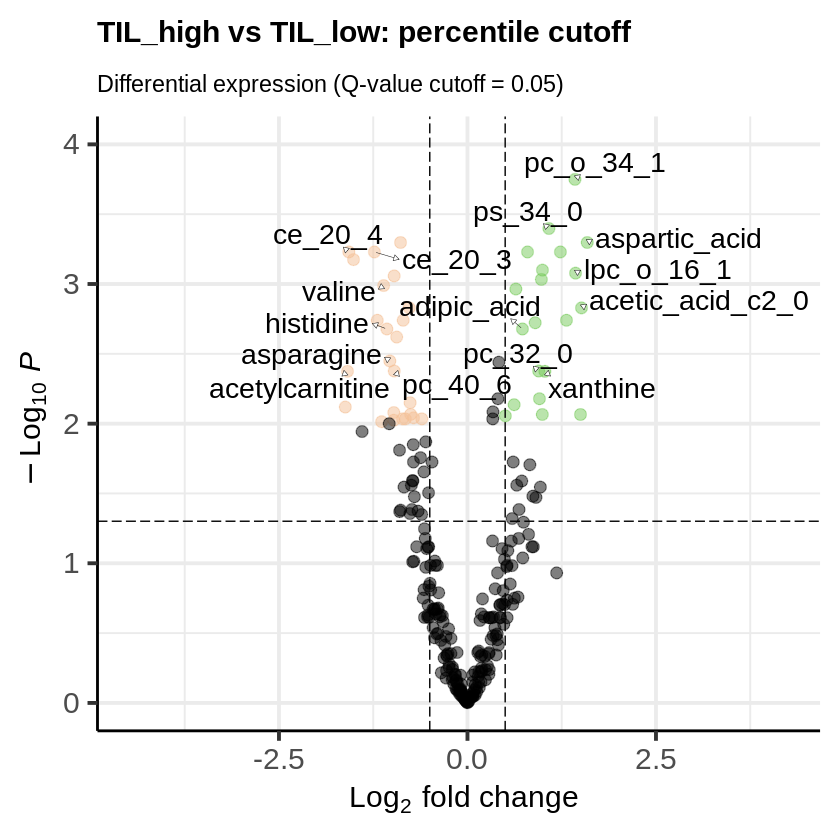

In [49]:
keyvals <- rep("#000000", nrow(psvd_cneg))
names(keyvals) <- rep("NS", nrow(psvd_cneg))

keyvals[which(psvd_cneg$logFC >= 0.5 &
                psvd_cneg$`adj.P.Val` < 0.01)] <- "#77c95a"
names(keyvals)[which(psvd_cneg$logFC >= 0.5 &
                       psvd_cneg$`adj.P.Val` < 0.01)] <- "PSVD"
keyvals[which(psvd_cneg$logFC <= -0.5 &
                psvd_cneg$`adj.P.Val` <= 0.01)] <- "#F4C095"
names(keyvals)[which(psvd_cneg$logFC <= -0.5 &
                       psvd_cneg$`adj.P.Val` <= 0.01)] <- "Cneg"
     


EnhancedVolcano(psvd_cneg,
                lab = psvd_cneg$feature,
#                selectLab = rownames(ccl4_cpos_cneg)[which(names(keyvals_ccl4) %in% c('high', 'low'))],
                colCustom = keyvals,
                x = "logFC",
#                xlim = c(-10, 10),
                y = "adj.P.Val",
                ylim = c(0, 4),
                title = expression(bold("TIL_high vs TIL_low: percentile cutoff")),
                subtitle = "Differential expression (Q-value cutoff = 0.05)",
                caption = NULL,
                pCutoff = 0.05,
                FCcutoff = 0.5,
                pointSize = 3.0,
                labSize = 6.0,
                drawConnectors = TRUE,
                widthConnectors = 0.15,
                max.overlaps = 10
               ) + theme(legend.position = "none")

## Outputs

In [52]:
cir_up <- subset(cir_cneg, adj.P.Val < 0.05)
cir_down <- subset(cir_up, logFC < 0)
cir_up <- subset(cir_up, logFC > 0)


psvd_up <- subset(psvd_cneg, adj.P.Val < 0.05)
psvd_down <- subset(psvd_up, logFC < 0)
psvd_up <- subset(psvd_up, logFC > 0)

In [17]:
psvd_up

feature,logFC,AveExpr,t,P.Value,adj.P.Val,B
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cer_d34_1,1.5460493,-6.880950e-02,7.957783,5.596817e-11,1.471963e-08,14.82352132
pc_o_32_0,1.5772015,-6.014061e-02,6.175067,6.150457e-08,5.421237e-06,8.00337632
deoxyuridine,0.7206404,-2.023096e-02,6.173666,6.183921e-08,5.421237e-06,7.99810481
citramalic_acid,1.7057129,-1.613875e-01,5.942330,1.510593e-07,9.932147e-06,7.13093090
lpc_o_18_1,2.2044226,-1.214860e-01,5.881874,1.905504e-07,1.002295e-05,6.90561515
glutamic_acid,2.7407699,-1.548370e-01,5.762532,3.009076e-07,1.318978e-05,6.46259778
lpc_o_16_0,1.9034048,-1.145205e-01,5.303890,1.702638e-06,5.597423e-05,4.78547394
pc_o_34_1,1.4257584,-3.904064e-02,4.958691,6.095344e-06,1.781195e-04,3.55567782
ps_34_0,1.0802662,-1.639385e-03,4.705481,1.523471e-05,4.006728e-04,2.67528804


In [53]:
write.csv(cir_up, "outputs/02_cir_up")
write.csv(cir_down, "outputs/02_cir_down")

write.csv(psvd_up, "outputs/02_psvd_up")
write.csv(psvd_down, "outputs/02_psvd_down")

In [56]:
write.csv(cir_cneg, "outputs/02_cir_cneg")
write.csv(psvd_cir, "outputs/02_psvd_cir")
write.csv(psvd_cneg, "outputs/02_psvd_cneg")